# PAC with datasets from CERN opendata
## PCA & packages

In [1]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import io

## Data

In [23]:
data = pd.read_csv('training.csv')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [25]:
n_data = data.drop(columns = ['EventId','Label'])
n_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [26]:
pca = PCA(n_components = 0.95)

n_data = preprocessing.scale(n_data)

z=pca.fit_transform(n_data)

print('pca後維度:',pca.n_components_)

pca後維度: 15


In [29]:
np.sum(pca.explained_variance_ratio_)#它代表降维後的各主成分的方差值占總方差值的比例，這個比例越大，則越是重要的主成分。

0.9603790182980806

In [30]:
np.sum(pca.explained_variance_)#它代表降维后的各主成分的方差值。方差值越大，則說明越是重要的主成分

29.771868654715124

In [31]:
#(資料筆數，維度)
print('z.shape :',z.shape)
print('data.shape :',n_data.shape)

z.shape : (250000, 15)
data.shape : (250000, 31)


In [32]:
print(z)

[[ 3.90911346e+00  5.78581199e-01 -1.80705097e+00 ...  6.83198493e-01
  -6.67599614e-01  7.61885512e-01]
 [-1.00243543e+00 -1.70261828e+00  6.45995957e-01 ...  2.84391493e-03
  -6.84505136e-01 -8.00539318e-01]
 [-7.27751351e-01  2.63559712e+00  4.31448779e+00 ...  1.88685645e+00
  -1.48932567e+00  5.11571991e-02]
 ...
 [-7.35822271e-01 -1.78417992e+00  7.22065055e-01 ...  4.26704194e-01
  -4.79957188e-02  3.52076794e-01]
 [-3.04071472e+00 -1.01537784e+00 -1.39508123e+00 ...  6.26691202e-01
  -6.47517432e-01  9.17163478e-01]
 [-3.30136900e+00  1.03935038e+00 -2.76123692e-01 ...  9.28851215e-01
  -5.15630205e-02 -1.44406756e-01]]


## Visualization

[0.40465852 0.08078588 0.07620049 0.06401584 0.05376054 0.05015486
 0.03894051 0.03648106 0.03247113 0.02927855 0.02533428 0.02148297
 0.01778491 0.01476022 0.01426925]

全部加總: 0.9603790182980806


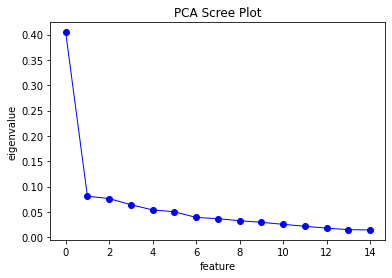

In [33]:
plt.ylabel('eigenvalue')
plt.xlabel('feature')
plt.title('PCA Scree Plot')
#plt.ylim(0,1)
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=1,color='r',linestyle='--')
plt.plot(pca.explained_variance_ratio_,'o-',linewidth=1,color='blue')
print(pca.explained_variance_ratio_)
print('\n全部加總:',sum(pca.explained_variance_ratio_))
plt.show()

[12.54446445  2.50437245  2.36222464  1.98449892  1.66658327  1.55480702
  1.20716074  1.13091741  1.00660891  0.90763854  0.78536584  0.66597477
  0.55133452  0.45756853  0.44234864]

全部加總: 29.771868654715124


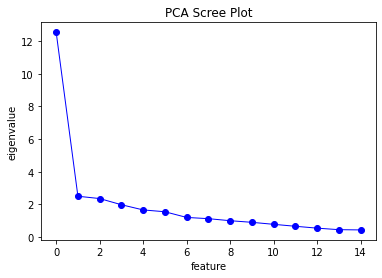

In [34]:
plt.ylabel('eigenvalue')
plt.xlabel('feature')
plt.title('PCA Scree Plot')
#plt.ylim(0,1)
#plt.style.context('seaborn-whitegrid')
#plt.axhline(y=1,color='r',linestyle='--')
plt.plot(pca.explained_variance_,'o-',linewidth=1,color='blue')
print(pca.explained_variance_)
print('\n全部加總:',sum(pca.explained_variance_))
plt.show()